# Lineas de Campo y equipotenciales de cargas puntuales

 ### Lineas de Campo
 Las líneas de campo son una ayuda para visualizar un campo electrostático, magnético o cualquier otro campo vectorial estático, además definen superficies equipotenciales perpendiculares a estas.
 ### Superficie Equipotencial
 Lugar geométrico de los puntos de un campo escalar en los cuales el "potencial de campo" o valor numérico de la función que representa el campo, es constante
 ### Carga Puntual
  Es una carga eléctrica hipotética, de magnitud finita, consiste en dos cuerpos con carga que son muy pequeños en comparación con la distancia que los separa. 

In [7]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/40/Cargas3.PNG')

In [8]:
Image(url='http://laplace.us.es/wiki/images/thumb/7/78/Potencial-dos-cargas.png/300px-Potencial-dos-cargas.png')

In [9]:
Image(url='http://laplace.us.es/wiki/images/thumb/5/5b/Potencial-dipolo.png/300px-Potencial-dipolo.png')

Valor de la carga 1: 1
Valor de la carga 2: 1


/projects/sage/sage-6.9/local/lib/python2.7/site-packages/ipykernel/__main__.py:72: RuntimeWarning: invalid value encountered in true_divide
/projects/sage/sage-6.9/local/lib/python2.7/site-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


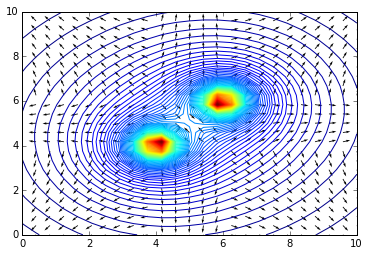

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pylab as plt

#Potencial de una particula puntual cargada
def Phi( r, rp, q ):
    phi = 1/(4*np.pi*eps0)*q/np.linalg.norm( r - rp )
    return phi

#Campo electrico de una particula puntual cargada
def Electric( r, rp, q ):
    E = 1/(4*np.pi*eps0)*q/(r - rp)/np.linalg.norm( r - rp )**3
    return E

#Permitividad del vacio
eps0 = 8.85418e-12
#Resolucion de graficas
Nres = 25
#Coordenada X
Xarray = np.linspace( 0, 10, Nres )
#Coordenada Y
Yarray = np.linspace( 0, 10, Nres )
#Construccion de la cuadricula
X, Y = plt.meshgrid( Xarray, Yarray )

#CONSTRUCCION DE CAMPO E Y POTENCIAL PHI, PARTICULA 1
#Carga electrica
q1 = int(input('Valor de la carga 1: '))
#Posicion particula
rp1 = np.array( [4,4] )
#Incializacion Potencial Electrico
phi1 = np.zeros( (Nres,Nres) )
#Incializacion Campo Electrico
E1x = np.ones( (Nres,Nres) )
E1y = np.ones( (Nres,Nres) )
#Calculo Potencial Electrico y Campo Electrico
for i in xrange(Nres):
    for j in xrange(Nres):
	r = np.array( [Xarray[i], Yarray[j]] )
	phi1[i,j] = Phi( r, rp1, q1 )
	E = Electric( r, rp1, q1 )
	E1x[i,j], E1y[i,j] = E/np.linalg.norm(E)

#CONSTRUCCION DE CAMPO E Y POTENCIAL PHI, PARTICULA 2
#Carga electrica
q2 = int(input('Valor de la carga 2: '))
#Posicion particula
rp2 = np.array( [6,6] )
#Incializacion Potencial Electrico
phi2 = np.zeros( (Nres,Nres) )
#Incializacion Campo Electrico
E2x = np.ones( (Nres,Nres) )
E2y = np.ones( (Nres,Nres) )
#Calculo Potencial Electrico y Campo Electrico
for i in xrange(Nres):
    for j in xrange(Nres):
	r = np.array( [Xarray[i], Yarray[j]] )
	phi2[i,j] = Phi( r, rp2, q2 )
	E = Electric( r, rp2, q2 )
	E2x[i,j], E2y[i,j] = E/np.linalg.norm(E)

#CONSTRUCCION DE CAMPO E Y POTENCIAL PHI, TOTAL
phi_tot = phi1 + phi2
#Incializacion Campo Electrico
Ex_tot = np.ones( (Nres,Nres) )
Ey_tot = np.ones( (Nres,Nres) )
#Calculo Potencial Electrico y Campo Electrico Total
for i in xrange(Nres):
    for j in xrange(Nres):
	E = np.array( [E1x[i,j] + E2x[i,j], \
	E1y[i,j] + E2y[i,j]] )
	E = E/np.linalg.norm(E)
	Ex_tot[i,j], Ey_tot[i,j] = E 

#Grafica de equipotenciales
plt.contour(X, Y, phi_tot, 100)
#Grafica de lineas de campo
plt.quiver( X, Y, Ey_tot, Ex_tot)

#Limites del eje X
plt.xlim( (0,10) )
#Limites del eje Y
plt.ylim( (0,10) )
plt.legend()
plt.show()